# Plotting with Seaborn
Used Matplotlib before, you may have wondered, “why does it take me 10 lines of code just to make a decent-looking histogram?”

Well, if you’re looking for a simpler way to plot attractive charts, then you’ll love Seaborn. 
I will use here the pkemon data set to visualise the data

In [169]:
import pandas as pd

In [136]:
from matplotlib import pyplot as plt
%matplotlib inline

In [137]:
import seaborn as sns
df = pd.read_csv(r"C:\Users\Himanshu Poddar\Downloads\Pokemon.csv", index_col=0, encoding='ISO-8859-1')

In [138]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


## Scatterplot

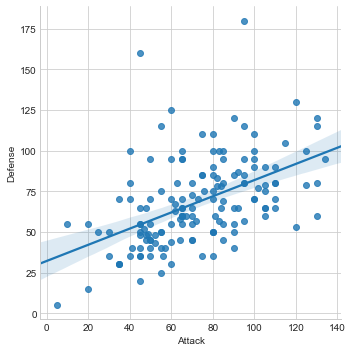

In [139]:
#Plotting scatterplot with seaborn
sns.lmplot(x='Attack', y='Defense', data=df)
#Alternatively
#sns.lmplot(x=df.Attack, y=df.Defense)

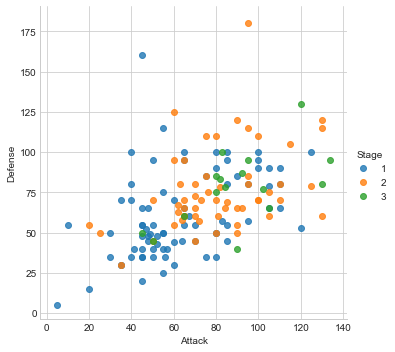

In [140]:
#Wait why this line?
'''
Seaborn doesn't have a dedicated scatter plot function, which is why we see a diagonal line. 
We actually used Seaborn's function for fitting and plotting a regression line.
'''
#But the function has several options by whih we can tweak and twist the plot
#fit_reg=False is used to remove the regression line, since we only want a scatter plot.
# Scatterplot arguments
'''
we'll set hue='Stage' to color our points by the Pokémon's evolution stage. 
This hue argument is very useful because it allows us to express a third dimension of information using color.
'''
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

## BOXPLOT

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

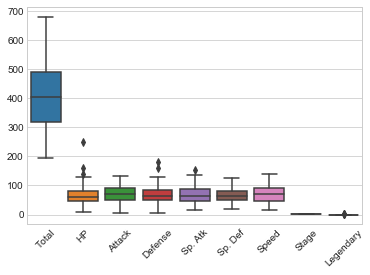

In [141]:
#let's say we want to make a box plot for our Pokémon's combat stats
# Boxplot
sns.boxplot(data = df)
#Rotating the x labels by 45
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

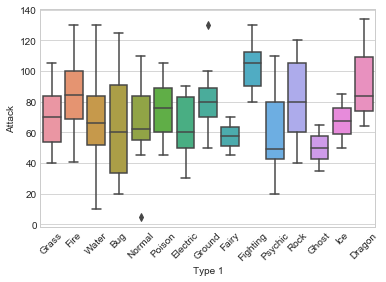

In [142]:
sns.boxplot(x=df['Type 1'], y=df['Attack'])
#Rotating the x labels by 45
plt.xticks(rotation=45)
#If you want to change the axis or roate it by 90 you can just change the x and y label, it works!!!

## Violin plots

Violin plots with seaborn
What are violin plots

Violin plots are useful alternatives to box plots.
They show the distribution (through the thickness of the violin) instead of only the summary statistics.


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

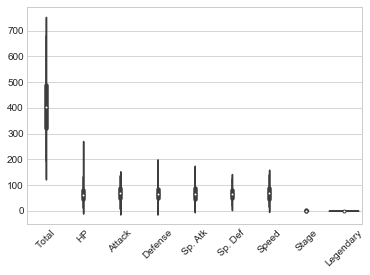

In [172]:
# You can set theme too
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(data=df)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

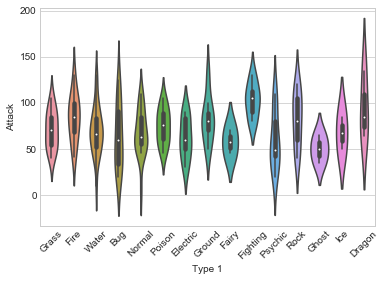

In [173]:
sns.set_style('whitegrid')
# Violin plot
sns.violinplot(data=df, x='Type 1', y='Attack')
plt.xticks(rotation=45)

 Changing the color of violin plots
 Seaborn allows us to set custom color palettes.<br> We can simply create an ordered Python list of color hex values.
 https://en.wikipedia.org/wiki/Violin_plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

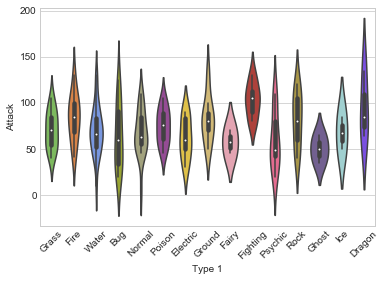

In [147]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette
plt.xticks(rotation=45)

## SWARMPLOTS

Violin plots are great for visualizing distributions.  <br>
However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.<br>
That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:<br>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

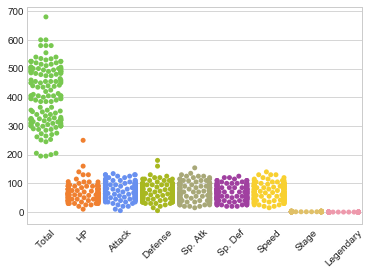

In [148]:
sns.swarmplot(data=df, 
              palette=pkmn_type_colors)
plt.xticks(rotation=45)
#Though it does not make any sense, as our values are not scaled

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

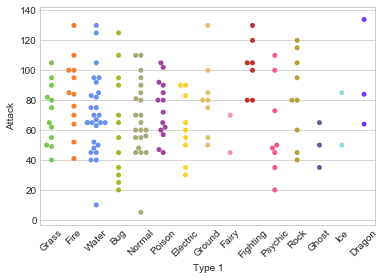

In [149]:
#For getting the distribution in a single column
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)
plt.xticks(rotation=45)

## Overlaying plots

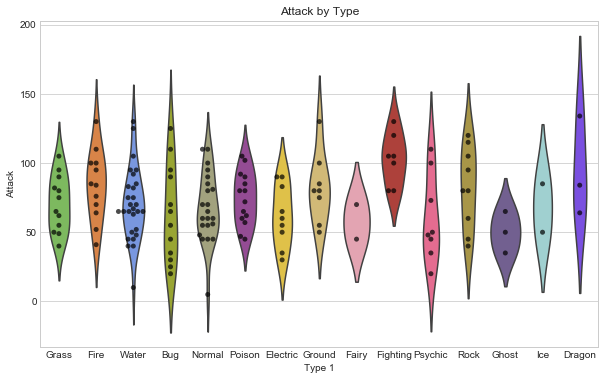

In [150]:
# we can combine our swarm plot and the violin plot after all they represent the same thing

# Set figure size with matplotlib
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [151]:
fd = df.copy()

# Melting a dataframe

# Python melt function

Similar to pivot table melt is used to reshape the data. <br>
Sometimes we may want to transform our data where column values are changed <br>
to row values and are repeated as many times as their individual column length. <br>

pd.melt(dataframe, id_variables(the thing that we want on our x - axis or <br>
made up of the column that we want to keep intact, <br>
made up of    name of variable or the column that is going to be changed, valuename)


In [175]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [154]:
melted_df = pd.melt(df.drop(['Total', 'Stage', 'Legendary'], axis = 1), 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="stat") # Name of melted variable or the column which has been transformed
                                     # value column gives the column for that corresponding column

In [155]:
melted_df.head(5)

,Name,Type 1,Type 2,stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [156]:
#All 9 of the stat columns have been "melted" into one, 
#and the new Stat column indicates the original 
#stat (HP, Attack, Defense, Sp. Attack, Sp. Defense, or Speed)
print( df.shape )
print( melted_df.shape )

(151, 12)
(906, 5)


## Swarmplot on melted data

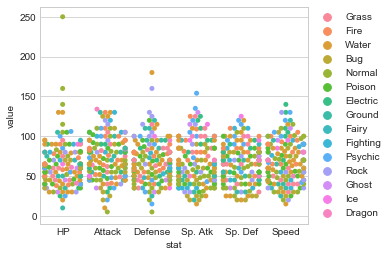

In [157]:
### Let's make a swarm plot with melted_df
sns.swarmplot(x='stat', y='value', data=melted_df, 
              hue='Type 1')

# Put a legend to the right of the graph
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#We can see the distribution for each sub type

c:\users\himanshu poddar\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


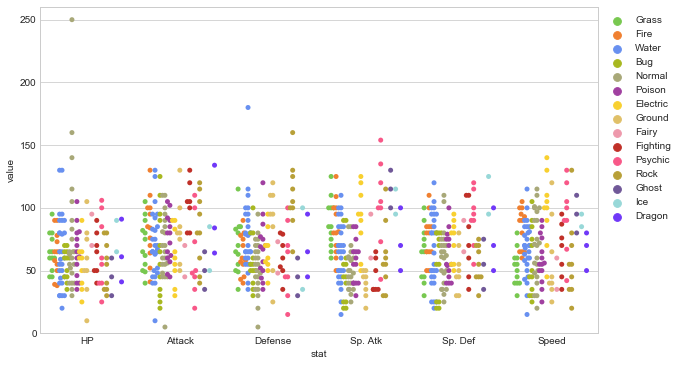

In [158]:
# let's make a few final tweaks for a more readable chart:
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [159]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis = 1)

## HEATMAPS
Heatmaps help you visualize matrix-like data.<br>
Calculate correlations

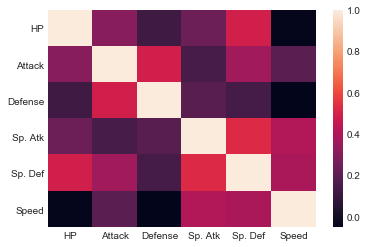

In [176]:
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

## Histograms
Histograms allow you to plot the distributions of numeric variables.
Distribution Plot (a.k.a. Histogram)

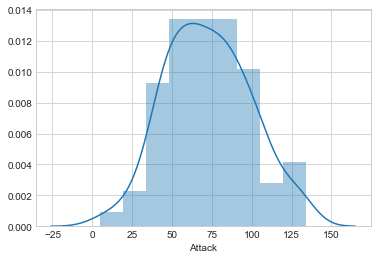

In [161]:
sns.distplot(df.Attack)

## Barplot
Bar plots help you visualize the distributions of categorical variables.<br>
Count Plot (a.k.a. Bar Plot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

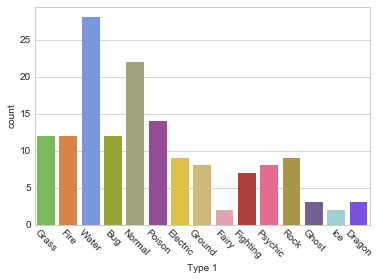

In [162]:
#Here we have plotted the total number of type of pokemon
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

## FACTOR PLOTS
Factor plots make it easy to separate plots by categorical classes.

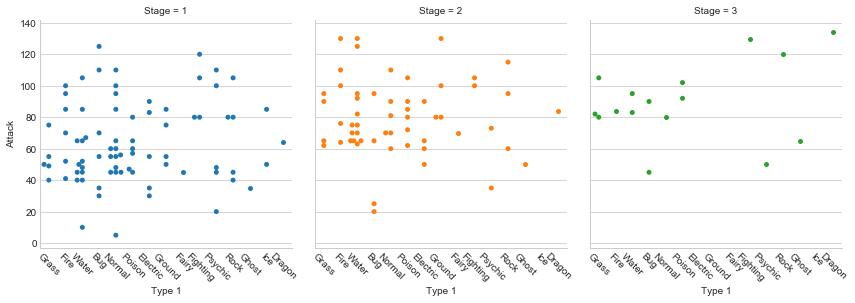

In [163]:
# Factor Plot
#WE have to provide separate by column to the function, here col
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)



## Density plots
Density plots display the distribution between two variables.

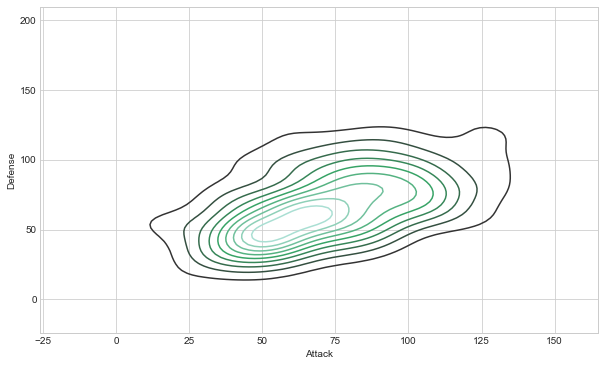

In [178]:
plt.figure(figsize=(10,6))
sns.kdeplot(df.Attack, df.Defense)

### Overlaying a density plot on scatter plot

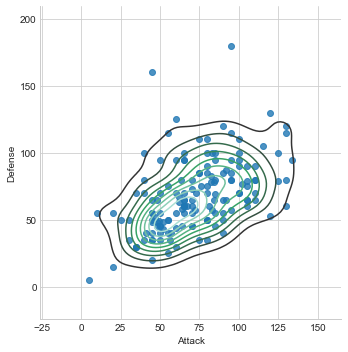

In [165]:
# Did'nt get anything lets see,
# Visulaise this
#Overlaying a scatter plot and a density plot

sns.lmplot(x = 'Attack',y =  'Defense',data = df,
           fit_reg=False) 
sns.kdeplot(df.Attack, df.Defense)


## Joint Scatter Plot
Joint distribution plots combine information  from scatter plots and histograms to give  <br>
you detailed information for bi-variate distributions

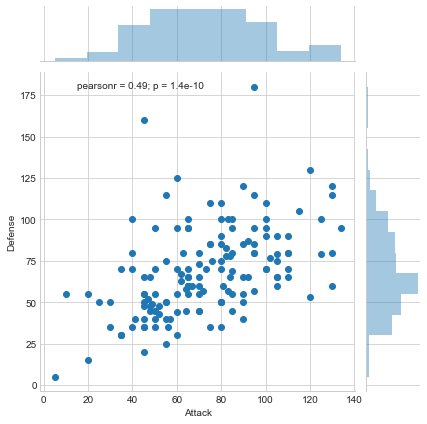

In [180]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)